In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
sample = pd.read_csv('hospitalization_clean.csv')
sample.head()

,County,Year,subgroup1,subgroup_cat1,subgroup2,subgroup_cat2,aaRate10K,count,cRate10K,dailyMean
0,Albany,2000-2002,AgeGroup,35+,Total,Total,108.794,1851,118.01,1.689
1,Albany,2001-2003,AgeGroup,35+,Total,Total,101.815,1749,110.65,1.597
2,Albany,2002-2004,AgeGroup,35+,Total,Total,92.198,1598,100.36,1.458
3,Albany,2003-2005,AgeGroup,35+,Total,Total,85.739,1501,93.53,1.370
4,Albany,2004-2006,AgeGroup,35+,Total,Total,80.240,1417,87.68,1.293


In [51]:
data = sample[(sample.subgroup1 == 'AgeGroup')&(sample.subgroup_cat1 != '35+') ]
data

,County,Year,subgroup1,subgroup_cat1,subgroup2,subgroup_cat2,aaRate10K,count,cRate10K,dailyMean
2045,New York State,2000,AgeGroup,0-34,Total,Total,57.192472,303,0.33,0.828
2046,New York State,2000-2002,AgeGroup,0-34,Total,Total,175.918760,932,1.02,0.850
2047,New York State,2001,AgeGroup,0-34,Total,Total,58.702505,311,0.34,0.852
2048,New York State,2001-2003,AgeGroup,0-34,Total,Total,181.770135,963,1.05,0.879
2049,New York State,2002,AgeGroup,0-34,Total,Total,60.023783,318,0.35,0.871
...,...,...,...,...,...,...,...,...,...,...
2388,New York State,2000-2018,AgeGroup,45-54,Grand Total,Grand Total,6566.451168,89483,326.21,12.894
2389,New York State,2000-2018,AgeGroup,55-64,Grand Total,Grand Total,11928.335774,135222,610.38,19.484
2390,New York State,2000-2018,AgeGroup,65-74,Grand Total,Grand Total,7641.198968,146047,1023.05,21.044
2391,New York State,2000-2018,AgeGroup,75-84,Grand Total,Grand Total,7389.091286,156781,1768.20,22.591


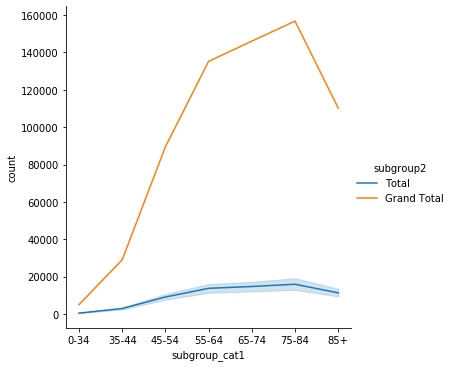

In [52]:
sns.relplot(x="subgroup_cat1", y="count", hue='subgroup2', kind="line", data=data)

In [59]:
sample['County'].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New York County', 'Niagara', 'Oneida', 'Onondaga',
       'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam',
       'Queens', 'Rensselaer', 'Richmond', 'Rockland', 'St. Lawrence',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'Steuben', 'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster',
       'Warren', 'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates',
       'NYS excluding NYC', 'New York City', 'New York State'],
      dtype=object)

In [72]:
data = pd.DataFrame(sample[(sample.County.isin(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
                                               'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
                                               'Queens', 'Rensselaer', 'Richmond', 'Rockland', 'St. Lawrence',]))].groupby("County")['count'].mean())
data

,count
County,
Albany,1805.277778
Allegany,467.111111
Bronx,8231.388889
Broome,1991.111111
Cattaraugus,839.055556
Cayuga,925.055556
Chautauqua,744.055556
Chemung,843.722222
Chenango,564.666667


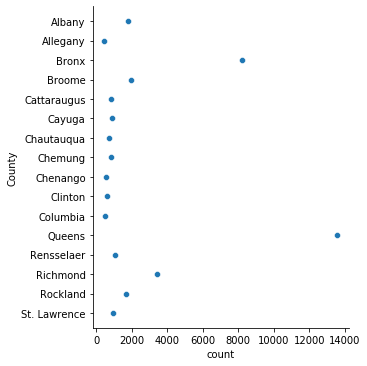

In [73]:
sns.relplot(x="count", y="County", data=data)

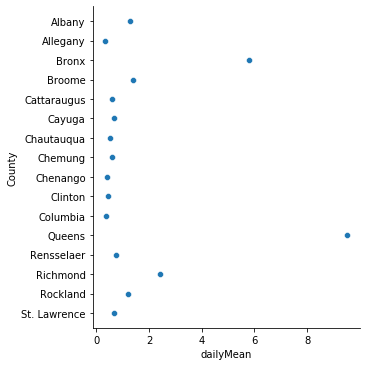

In [77]:
data = pd.DataFrame(sample[(sample.County.isin(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
                                               'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
                                               'Queens', 'Rensselaer', 'Richmond', 'Rockland', 'St. Lawrence',]))]
                    .groupby("County")['dailyMean'].mean())
sns.relplot(x="dailyMean", y="County", data=data)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8FE8BD788>,
      dtype=object)

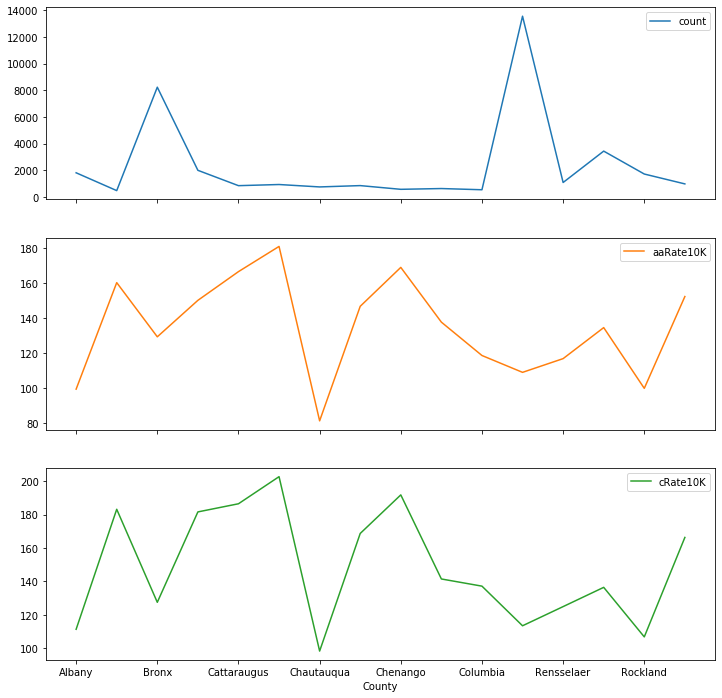

In [100]:
data = pd.DataFrame(sample[(sample.County.isin(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
                                               'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
                                               'Queens', 'Rensselaer', 'Richmond', 'Rockland', 'St. Lawrence',]))]
             .groupby(["County"])[['count', 'aaRate10K','cRate10K']].mean())
data.plot.line(subplots=True, figsize=(12,12))
# data.plot(figsize=(3,3));
